In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\Machine Learning\ML_Task_01\dataset_combined.csv")
print(df)

                                                  Path     Identity  \
0    C:\Users\User\Desktop\Machine Learning\Persona...  Hamza Ahmad   
1    C:\Users\User\Desktop\Machine Learning\Persona...  Hamza Ahmad   
2    C:\Users\User\Desktop\Machine Learning\Persona...  Hamza Ahmad   
3    C:\Users\User\Desktop\Machine Learning\Persona...  Hamza Ahmad   
4    C:\Users\User\Desktop\Machine Learning\Persona...  Hamza Ahmad   
..                                                 ...          ...   
194  C:\Users\User\Desktop\Machine Learning\Other\G...      Unknown   
195  C:\Users\User\Desktop\Machine Learning\Other\G...      Unknown   
196  C:\Users\User\Desktop\Machine Learning\Other\G...      Unknown   
197  C:\Users\User\Desktop\Machine Learning\Other\G...      Unknown   
198  C:\Users\User\Desktop\Machine Learning\Other\G...      Unknown   

      Expression  Age  
0        Smiling   23  
1    Not Smiling   23  
2    Not Smiling   23  
3        Smiling   23  
4    Not Smiling   23  
.. 

In [3]:
train, test = train_test_split(df, test_size=0.3, random_state = 8, stratify=df['Identity'])

In [4]:
train.loc[train['Identity'] == "Hamza Ahmad"].describe()

,Age
count,70.0
mean,23.0
std,0.0
min,23.0
25%,23.0
50%,23.0
75%,23.0
max,23.0


In [5]:
X_data = train['Path']
X_tdata = test['Path']
y1_train = train['Identity']
y2_train = train['Expression']
y3_train = train['Age']
y1_test = test['Identity']
y2_test = test['Expression']
y3_test = test['Age']

In [6]:
y1_train.head()

119        Unknown
184        Unknown
137        Unknown
147        Unknown
57     Hamza Ahmad
Name: Identity, dtype: object

In [7]:
label_encoder = LabelEncoder()
label_encoder.fit(y1_train)
print(y1_train)
encoded_labels1 = label_encoder.transform(y1_train)
print(encoded_labels1)
encoded_labels2 = label_encoder.transform(y1_test)
print()
print(encoded_labels2)

119        Unknown
184        Unknown
137        Unknown
147        Unknown
57     Hamza Ahmad
          ...     
146        Unknown
99     Hamza Ahmad
173        Unknown
112        Unknown
196        Unknown
Name: Identity, Length: 139, dtype: object
[1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0
 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0
 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1]

[0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0]


In [8]:
import skimage
from skimage import io
from skimage import transform

def preprocess_image(path):
    curr_image = io.imread(path)
    img_resize = transform.resize(curr_image, output_shape=(32, 32, 3))
    img_reshape = np.reshape(img_resize, (32 * 32 * 3))
    return img_reshape / 255.

In [9]:
X_train = np.array([preprocess_image(path) for path in X_data])
X_test = np.array([preprocess_image(path) for path in X_tdata])

In [10]:
print(X_train)
print()
print(X_test)

[[1.66328144e-09 1.48220307e-10 3.34815671e-09 ... 2.63400130e-04
  2.22062786e-04 2.04710808e-04]
 [1.99298316e-04 2.02587713e-04 1.88838869e-04 ... 6.28311026e-04
  6.06393260e-04 8.88015225e-04]
 [3.10124324e-09 1.57079063e-10 1.57079063e-10 ... 1.81432339e-03
  1.41550950e-03 9.77741324e-04]
 ...
 [5.04840641e-04 9.56297262e-04 1.39210290e-03 ... 1.38349955e-04
  1.58237794e-04 1.28406035e-04]
 [1.61878305e-03 2.13411590e-03 1.80315050e-03 ... 1.23263813e-03
  1.85697672e-03 2.24190460e-03]
 [4.68443181e-05 5.84830333e-04 5.93216721e-04 ... 2.68682389e-03
  2.61408306e-03 2.28979254e-03]]

[[2.75277989e-03 2.60174350e-03 2.45682991e-03 ... 4.36705111e-04
  5.07810901e-04 5.67416199e-04]
 [2.34106457e-03 2.25178633e-03 1.96361216e-03 ... 3.41715368e-03
  3.41914867e-03 3.41800007e-03]
 [2.14927631e-04 1.84170230e-04 2.61063733e-04 ... 1.04921582e-04
  8.23339448e-05 1.49411809e-04]
 ...
 [1.28461642e-04 2.10115445e-05 3.62148388e-05 ... 5.11418633e-05
  5.08983248e-05 4.92253953e-05

In [11]:
input_layer = keras.layers.Input(shape=(32*32*3,))
X = keras.layers.Dense(1, activation='sigmoid')(input_layer)
model = keras.Model(inputs = input_layer, outputs = X)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 1)                 3073      
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_checkpoint2.h5',  # Filepath to save the model
    monitor='loss',  # Metric to monitor (validation loss in this case)
    save_best_only=True,  # Save only the best model
    save_weights_only=False,  # Save the entire model (including architecture)
    mode='min'  # Mode for comparison (minimizing the monitored metric)
)

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, encoded_labels1, epochs=50, batch_size=8, callbacks=[checkpoint_callback])

preds = model.predict(X_test)
# print(preds)

#Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, encoded_labels2)

print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/50
18/18 [==============================] - 1s 4ms/step - loss: 0.6915 - accuracy: 0.6403
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.6043
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6817 - accuracy: 0.6043
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.6187
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 0.6331
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.6619
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6653 - accuracy: 0.6619
Epoch 8/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6614 - accuracy: 0.6763
Epoch 9/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.6763
Epoch 10/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6543 - accuracy: 0.6619
Epoch 11/50
18/18 [

In [17]:
#Convert the predictions back into labels
decoded_labels = label_encoder.inverse_transform(np.squeeze(preds).round().astype(int))

# Apply threshold to classify as Hamza Ahmad or Unknown
threshold = 0.5
final_predictions = np.where(preds <= threshold, 'Hamza Ahmad', 'Unknown')

# Print the final predictions
print(final_predictions)

[['Hamza Ahmad']
 ['Hamza Ahmad']
 ['Unknown']
 ['Hamza Ahmad']
 ['Unknown']
 ['Hamza Ahmad']
 ['Hamza Ahmad']
 ['Unknown']
 ['Unknown']
 ['Unknown']
 ['Unknown']
 ['Unknown']
 ['Unknown']
 ['Unknown']
 ['Unknown']
 ['Unknown']
 ['Hamza Ahmad']
 ['Hamza Ahmad']
 ['Unknown']
 ['Unknown']
 ['Unknown']
 ['Unknown']
 ['Unknown']
 ['Hamza Ahmad']
 ['Unknown']
 ['Hamza Ahmad']
 ['Unknown']
 ['Hamza Ahmad']
 ['Unknown']
 ['Unknown']
 ['Hamza Ahmad']
 ['Hamza Ahmad']
 ['Unknown']
 ['Unknown']
 ['Hamza Ahmad']
 ['Unknown']
 ['Unknown']
 ['Hamza Ahmad']
 ['Unknown']
 ['Hamza Ahmad']
 ['Hamza Ahmad']
 ['Hamza Ahmad']
 ['Hamza Ahmad']
 ['Unknown']
 ['Hamza Ahmad']
 ['Hamza Ahmad']
 ['Unknown']
 ['Hamza Ahmad']
 ['Hamza Ahmad']
 ['Unknown']
 ['Hamza Ahmad']
 ['Hamza Ahmad']
 ['Hamza Ahmad']
 ['Hamza Ahmad']
 ['Hamza Ahmad']
 ['Hamza Ahmad']
 ['Unknown']
 ['Unknown']
 ['Hamza Ahmad']
 ['Unknown']]


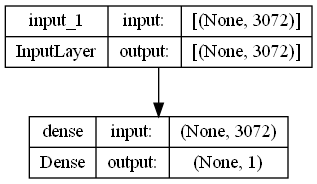

In [16]:
plot_model(model, to_file='model2.png', show_shapes=True, show_layer_names=True)